## Logistic Regression on Smarket dataset

#### Predict market directions from a set of previous days returns

In [23]:
require(ISLR)
names(Smarket)
str(Smarket)
#?(Smarket)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

'data.frame':	1250 obs. of  9 variables:
 $ Year     : num  2001 2001 2001 2001 2001 ...
 $ Lag1     : num  0.381 0.959 1.032 -0.623 0.614 ...
 $ Lag2     : num  -0.192 0.381 0.959 1.032 -0.623 ...
 $ Lag3     : num  -2.624 -0.192 0.381 0.959 1.032 ...
 $ Lag4     : num  -1.055 -2.624 -0.192 0.381 0.959 ...
 $ Lag5     : num  5.01 -1.055 -2.624 -0.192 0.381 ...
 $ Volume   : num  1.19 1.3 1.41 1.28 1.21 ...
 $ Today    : num  0.959 1.032 -0.623 0.614 0.213 ...
 $ Direction: Factor w/ 2 levels "Down","Up": 2 2 1 2 2 2 1 2 2 2 ...


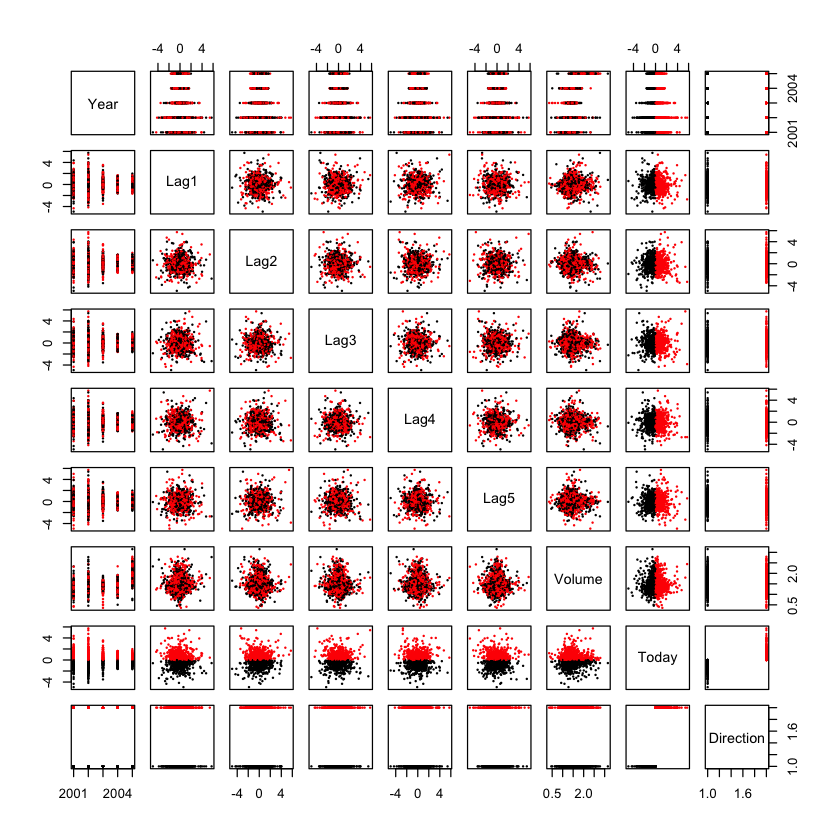

In [24]:
#apply a col to color separate a binary response variable
pairs(Smarket, cex=0.2, col=Smarket$Direction)

In [25]:
glm.fit<-glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume
            ,data=Smarket,family=binomial)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


In [26]:
glm.probs<-predict(glm.fit,type="response")
head(glm.probs)

1         2         3         4         5         6 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565

In [27]:
glm.pred<-ifelse(glm.probs>0.5, "Up", "Down")
head(glm.pred)

1      2      3      4      5      6 
  "Up" "Down" "Down"   "Up"   "Up"   "Up"

In [28]:
#confusion matrix on the whole dataset
attach(Smarket)
table(glm.pred,Direction)

The following objects are masked from Smarket (pos = 3):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Smarket (pos = 6):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year



        Direction
glm.pred Down  Up
    Down  145 141
    Up    457 507

In [29]:
print(paste("model correct rate",mean(glm.pred==Direction)))
print(paste("model error rate",mean(glm.pred!=Direction)))


[1] "model correct rate 0.5216"
[1] "model error rate 0.4784"


In [30]:
##make training and test set
train_idx <- Year<2005
head(train_idx)
tail(train_idx)

[1] TRUE TRUE TRUE TRUE TRUE TRUE

[1] FALSE FALSE FALSE FALSE FALSE FALSE

In [31]:
#make model on a training set
glm.fit<-glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume
            ,data=Smarket,family=binomial,subset=train_idx)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket, subset = train_idx)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.302  -1.190   1.079   1.160   1.350  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.191213   0.333690   0.573    0.567
Lag1        -0.054178   0.051785  -1.046    0.295
Lag2        -0.045805   0.051797  -0.884    0.377
Lag3         0.007200   0.051644   0.139    0.889
Lag4         0.006441   0.051706   0.125    0.901
Lag5        -0.004223   0.051138  -0.083    0.934
Volume      -0.116257   0.239618  -0.485    0.628

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1383.3  on 997  degrees of freedom
Residual deviance: 1381.1  on 991  degrees of freedom
AIC: 1395.1

Number of Fisher Scoring iterations: 3


In [32]:
#in real world scenario
# you make predictions on test dataset using a model trained on a training set
glm.probs<-predict(glm.fit, newdata=Smarket[!train_idx,], type="response")
glm.pred<-ifelse(glm.probs>0.5, "Up", "Down")

In [33]:
#confusion matrix on test dataset
Direction.2005<-Smarket[!train_idx,]$Direction
table(glm.pred,Direction.2005)
print(paste("model on test data correct rate",mean(glm.pred==Direction.2005)))
print(paste("model on test data error rate",mean(glm.pred!=Direction.2005)))

        Direction.2005
glm.pred Down Up
    Down   77 97
    Up     34 44

[1] "model on test data correct rate 0.48015873015873"
[1] "model on test data error rate 0.51984126984127"


In [34]:
#fit a smaller model (use Lag1 and Lag2 predictors)
glm.fit<-glm(Direction~Lag1+Lag2
            ,data=Smarket,family=binomial,subset=train_idx)
glm.probs<-predict(glm.fit, newdata=Smarket[!train_idx,], type="response")
glm.pred<-ifelse(glm.probs>0.5, "Up", "Down")
table(glm.pred,Direction.2005)
print(paste("Lag1+Lag2 model on test data error rate",mean(glm.pred!=Direction.2005)))

        Direction.2005
glm.pred Down  Up
    Down   35  35
    Up     76 106

[1] "Lag1+Lag2 model on test data error rate 0.44047619047619"


### Linear Discriminant Analysis (LDA) on SMarket dataset

In [35]:
require(MASS)
#lda fit
lda.fit<-lda(Direction~Lag1+Lag2,data=Smarket,subset=train_idx)
print(lda.fit)

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train_idx)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293


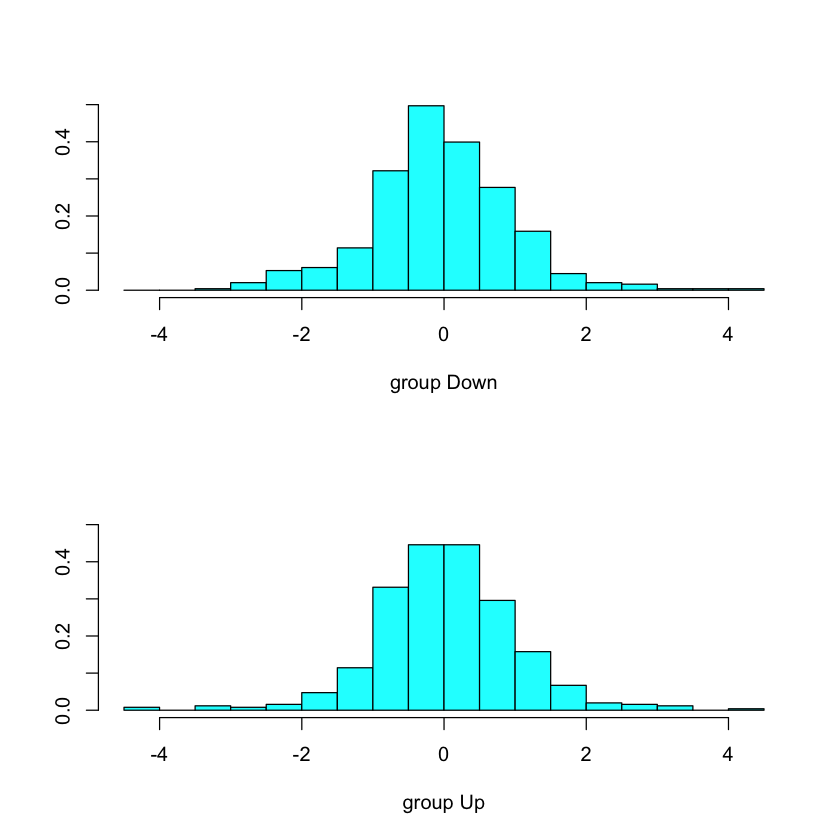

In [36]:
plot(lda.fit)

In [37]:
#define a test dataset
Smarket.test <- Smarket[!train_idx,]
dim(Smarket.test)

[1] 252   9

In [38]:
#get lda predictions
lda.pred<-predict(lda.fit,Smarket.test)
head(data.frame(lda.pred))
#format:  class is a predicted value
#posterior Down probability, posterior Up probability
# LDA score

,class,posterior.Down,posterior.Up,LD1
999,Up,0.4901792,0.5098208,0.08293096
1000,Up,0.4792185,0.5207815,0.59114102
1001,Up,0.4668185,0.5331815,1.16723063
1002,Up,0.4740011,0.5259989,0.83335022
1003,Up,0.4927877,0.5072123,-0.03792892
1004,Up,0.4938562,0.5061438,-0.08743142


In [39]:
table(lda.pred$class, Smarket.test$Direction)

      
       Down  Up
  Down   35  35
  Up     76 106

In [40]:
print(paste("LDA Lag1+Lag2 model on test data error rate",mean(lda.pred$class != Smarket.test$Direction )))

[1] "LDA Lag1+Lag2 model on test data error rate 0.44047619047619"


### Knn method on SMarket dataset

In [41]:
library(class)
#?knn

In [42]:
attach(Smarket)

The following objects are masked from Smarket (pos = 3):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Smarket (pos = 4):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Smarket (pos = 7):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year



In [43]:
#get a subset of columns which are used as predictors in the knn classification
Xlag<-cbind(Lag1,Lag2)
train_idx <- Year<2005
#train knn on a train dataset, and predict results on test dataset
#Direction[train_idx,] is a response vector on train dataset
knn.pred<-knn(Xlag[train_idx,], Xlag[!train_idx,], Direction[train_idx], k=1)
#cfm
table(knn.pred,Direction[!train_idx])
print(paste("knn k =1  Lag1+Lag2 model on test data error rate:",mean(knn.pred != Direction[!train_idx] )))

        
knn.pred Down Up
    Down   43 58
    Up     68 83

[1] "knn k =1  Lag1+Lag2 model on test data error rate: 0.5"


In [44]:
#knn lets redo with other values of k
set.seed(1)
k<-3
knn.pred<-knn(Xlag[train_idx,], Xlag[!train_idx,], Direction[train_idx], k=k)
print(paste("knn   Lag1+Lag2 model on test rror rate: with k=",k,":",mean(knn.pred != Direction[!train_idx] )))
k<-10
knn.pred<-knn(Xlag[train_idx,], Xlag[!train_idx,], Direction[train_idx], k=k)
print(paste("knn   Lag1+Lag2 model on test rror rate: with k=",k,":",mean(knn.pred != Direction[!train_idx] )))
k<-50
knn.pred<-knn(Xlag[train_idx,], Xlag[!train_idx,], Direction[train_idx], k=k)
print(paste("knn   Lag1+Lag2 model on test rror rate: with k=",k,":",mean(knn.pred != Direction[!train_idx] )))




[1] "knn   Lag1+Lag2 model on test rror rate: with k= 3 : 0.468253968253968"
[1] "knn   Lag1+Lag2 model on test rror rate: with k= 10 : 0.472222222222222"
[1] "knn   Lag1+Lag2 model on test rror rate: with k= 50 : 0.507936507936508"
